In [16]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target
data.drop(['petal length (cm)', 'petal width (cm)'], axis=1, inplace=True)
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [17]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

# LDA

In [18]:
#импортируем LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# начинаем с обучения данных
lda.fit(X_train, y_train)
# прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0])

In [20]:
#разница факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,2,1
2,2,1
3,2,2
4,1,1
5,0,1
6,1,1
7,1,1
8,0,0
9,2,1


In [21]:
# отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7368421052631579

In [22]:
#коэффициенты дискриминатных линий
lda.coef_

array([[-6.26473814,  8.62773515],
       [ 1.6509541 , -3.68487568],
       [ 4.59383826, -4.58334372]])

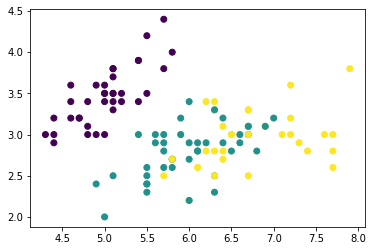

In [23]:
#визуализируем по имеющимся признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

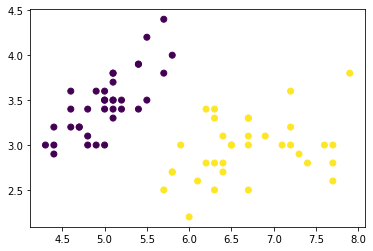

In [27]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)

plt.show()

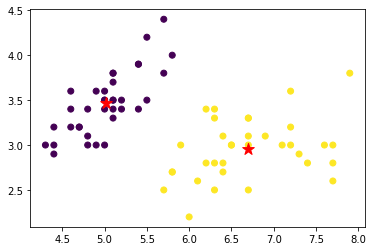

In [28]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

#определяем центроиды
lda_small.means_
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# Кластеризация

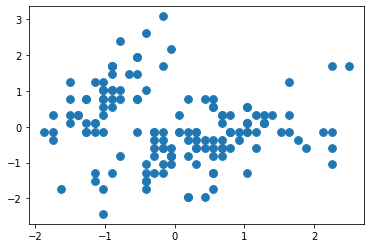

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data) # обучение и преобразование данных 
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60) # визуализация данных

In [30]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# обучение  и присвоение  кластера
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

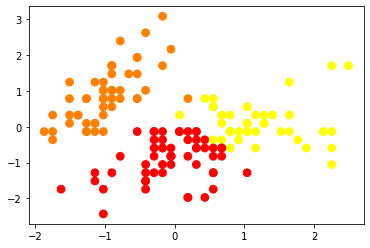

In [31]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)